# Analisando a Violência no Rio de Janeiro

É fato que a violência atinge todas as cidades do Brasil e vem ganhando destaque nos noticiários cada vez mais. O quadro de violência no Rio de Janeiro faz lembrar o ápice de violência no estado nos anos 1990, quando o índice de letalidade violenta atingiu o pico de 64,8 mortes por 100 mil habitantes, muito acima da taxa de 39,3 registrada no ano de 2018 ([BBC, 2019](https://www.bbc.com/portuguese/geral-47311996)).
<center>
    <img alt="Cristo Redentor - Rio" width="50%" src="img/rio.jpg" />
</center>
Atualmente, as leis de acesso à informação e a conscientização dos órgãos públicos vêm proporcionando a disponibilização de várias fontes de dados. A página de Dados Abertos do Instituto de Segurança Pública do Estado do Rio de Janeiro ([ISPDados](http://www.ispdados.rj.gov.br/)) disponibiliza dados referentes aos indicadores de violência registrados em cada mês, do ano de 1991 até o de 2019.

**Obtenção dos Dados**

Todos os dados contidos nesta análise foram obtidos a partir da página de Dados Abertos do Instituto de Segurança Pública do Estado do Rio de Janeiro ([ISPDados](http://www.ispdados.rj.gov.br/)).

**Importando os dados**

Começaremos importando nossos dados utilizando a biblioteca Pandas, da linguagem Python, e visualizando as 5 primeiras linhas registradas no arquivo.

In [1]:
# importando a biblioteca pandas e seaborn e lendo o arquivo csv
# visualizando as 5 primeiras linhas

import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

df = pd.read_csv('datasets/violencia_rio.csv')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


**Análise Inicial dos Dados**

Após importarmos o arquivo obtido, vamos começar a nossa análise. No dicionário das variáveis, temos uma pequena descrição do que cada uma das colunas significa.

**Dicionário das variáveis**

* vano - Ano da comunicação da ocorrência

* mes - Mês da comunicação da ocorrência

* hom_doloso - Homicídio doloso

* lesao_corp_morte - Lesão corporal seguida de morte

* latrocinio - Latrocínio (roubo seguido de morte)

* hom_por_interv_policial - Morte por intervenção de agente do Estado

* tentat_hom - Tentativa de homicídio

* lesao_corp_dolosa - Lesão corporal dolosa

* estupro - Estupro

* hom_culposo - Homicídio culposo (trânsito)

* lesao_corp_culposa - Lesão corporal culposa (trânsito)

* roubo_comercio - Roubo a estabelecimento comercial

* roubo_residencia - Roubo a residência

* roubo_veiculo - Roubo de veículo

* roubo_carga - Roubo de carga

* roubo_transeunte - Roubo a transeunte

* roubo_em_coletivo - Roubo em coletivo

* roubo_banco - Roubo a banco

* roubo_cx_eletronico - Roubo de caixa eletrônico

* roubo_celular - Roubo de telefone celular

* roubo_conducao_saque - Roubo com condução da vítima para saque em instituição financeira

* roubo_apos_saque - Roubo após saque em instituição financeira

* roubo_bicicleta - Roubo de bicicleta

* outros_roubos - Outros roubos que não os listados acima

* total_roubos - Total de roubos

* furto_veiculos -  Furto de veículo

* furto_transeunte - Furto a transeunte

* furto_coletivo - Furto em coletivo

* furto_celular - Furto de telefone celular

* furto_bicicleta - Furto de bicicleta

* outros_furtos - Outros furtos que não os listados acima

* total_furtos - Total de furtos

* sequestro - Extorsão mediante sequestro (sequestro clássico)

* extorsao - Extorsão 

* sequestro_relampago - Extorsão com momentânea privação da liberdade (sequestro relâmpago)

* estelionato - Estelionato

* apreensao_drogas - Apreensão de drogas

* posse_drogas - Número de registros que possuem algum título referente a posse de drogas

* trafico_drogas - Número de registros que possuem algum título referente a tráfico de drogas

* apreensao_drogas_sem_autor - Número de registros que possuem algum título referente a apreensão de drogas sem autor

* recuperacao_veiculos -  Recuperação de veículo

* apf - Auto de prisão em flagrante

* aaapai - Auto de apreensão de adolescente por prática de ato infracional

* cmp - Cumprimento de mandado de prisão

* cmba - Cumprimento de mandado de busca e apreensão

* ameaca - Ameaça

* pessoas_desaparecidas - Pessoas desaparecidas

* encontro_cadaver - Encontro de cadáver

* encontro_ossada - Encontro de ossada

* pol_militares_mortos_serv - Policiais Militares mortos em serviço

* pol_civis_mortos_serv - Policiais Civis mortos em serviço

* indicador_letalidade - Indicadores Estratégicos: Crimes violentos letais intencionais

* indicador_roubo_rua - Indicadores Estratégicos: Roubo de rua

* indicador_roubo_veic - Indicadores Estratégicos: Roubo de veículo

* registro_ocorrencias - Registro de ocorrências

* fase - Consolidado sem errata (2) ou com errata (3)

Como podemos ver, o nosso arquivo tem 344 linhas e 56 colunas. 


In [2]:
# visualizando a quantidade de linhas e colunas do nosso conjunto de dados

df.shape

(344, 56)

Podemos ver também que todas as nossas colunas são do tipo de dado *int64* ou *float64*, ou seja, são colunas que contêm dados numéricos.

In [3]:
# visualizando os tipos de dados das colunas

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Antes, visualizamos as 5 primeiras linhas para termos uma ideia inicial sobre as informações que estão no nosso conjunto de dados. Podemos ver que os primeiros registros contêm informações referentes aos primeiros meses do ano de 1991. Agora, visualizando os últimos registros, podemos ver que eles são referentes a meses do ano de 2019.

In [4]:
# visualizando as 5 últimas linhas

df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,...,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Antes de fazermos análises estatísticas, precisamos ver o percentual de linhas que possuem dados faltantes, ou seja, que não foram registrados. Dependendo do percentual de dados faltantes de uma coluna específica, temos que realizar alguns processos para que a nossa análise estatística seja o mais correta possível. 

Podemos ver que há valores faltantes em várias colunas:

* As colunas *roubo_bicicleta* e *furto_bicicleta* possuem 80%;
* As colunas *apreensao_drogas_sem_autor*, *posse_drogas*, *apf*,*aaapai*, *cmp*, *trafico_drogas* e *cmba* possuem 52%;
* As colunas *sequestro_relampago*, *furto_coletivo*, *extorsao*, *furto_celular*, *roubo_apos_saque*, *roubo_conducao_saque*, *roubo_cx_eletronico*, *estupro*, *estelionato*, *pol_civis_mortos_serv* e *pol_militares_mortos_serv* possuem 41%;
* As colunas *pessoas_desaparecidas* e *encontro_ossada* possuem 38%;
* A coluna *roubo_celular* possui 31%;
* As colunas *lesao_corp_culposa*, *ameaca*, *sequestro*, *lesao_corp_morte* e *registro_ocorrencias* possuem 27%;
* As colunas *hom_por_interv_policial* e *hom_culposo* possuem 24%.



In [5]:
# visualizando a quantidade (percentual) de linhas, por coluna, que possuem dados faltantes

((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


**Informações Estatísticas da Violência no Rio de Janeiro**

Com os dados que temos, podemos fazer análises estatísticas a fim de chegarmos a algumas conclusões referentes à violência no estado do Rio de Janeiro. Com a função 'describe()', visualizamos informações como: a média de todos os valores de uma coluna (mean), a quantidade de valores válidos em cada coluna (count), o desvio-padrão dos valores de cada coluna (std), o valor máximo de cada coluna (max), o valor mínimo de cada coluna (min) e os quartis.

In [6]:
# visualizando dados estatísticos referentes a cada uma das colunas

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


**Roubos/Furtos e Recuperação de Veículos**

E se estivermos interessados em saber somente sobre assaltos, furtos e recuperação de veículos? Podemos visualizar somente esses dados. A utilização da função 'copy()' faz com que possamos trabalhar em um novo dataframe sem interferir no original, que pode vir a ser utilizado a qualquer momento, com os seus dados originais.

In [7]:
# criando um novo dataframe somente com as colunas referentes a roubos, furtos e recuperações de veículos

df_veiculos = df[['vano', 'mes', 'roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].copy()
df_veiculos[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000
mean,2448.697674,1674.671512,1772.238372
std,789.689559,294.852020,656.761843
min,1097.000000,1159.000000,729.000000
25%,1889.750000,1430.500000,1276.750000
50%,2322.000000,1637.500000,1755.000000
75%,2778.000000,1833.250000,2202.000000
max,5358.000000,2630.000000,3695.000000


Vamos ver a distribuição dos nossos dados em um formato gráfico. Para isso, utilizaremos gráficos no formato de caixas (*boxplot*). Nestes gráficos, podemos ver uma linha verde que representa o segundo quartil, ou seja, a mediana. A mediana é o valor que se encontra no meio dos dados, quando ordenados do menor para o maior. Olhando os gráficos, notamos que:

* Há meses com mais de 4.000 roubos a veículos registrados;
* Foram registrados mais roubos do que furtos a veículos;
* Há pelo menos um registro com mais de 3.500 recuperações de veículos em um mês.

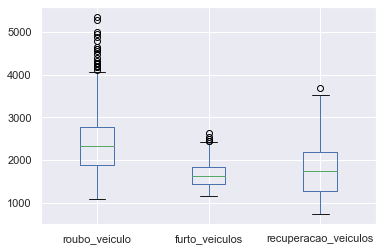

In [8]:
# boxplot com os valores das colunas roubo_veiculo, furto_veiculos e recuperacao_veiculos

df_veiculos[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].plot(kind = 'box');

**Regra 1.5xIQR (Interquartile Range)**

Os estatísticos desenvolveram diversas maneiras de identificar o que pode e o que não pode ser considerado um outlier. Uma regra bastante usada afirma que um dado é um outlier quando ele é maior que 1.5 x IQR acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1). O IQR é a diferença entre o terceiro e o primeiro quartil. Com a obtenção dos valores dos primeiros e terceiros quartis de cada uma das colunas podemos calcular o IQR e descobrir a partir de qual valor pode ser considerado um outlier, ou seja, um valor que destoa dos demais presentes no conjunto de dados.

In [9]:
# obtendo o primeiro e terceiro quartil de cada coluna

Q1_roubo, Q1_furto, Q1_recuperacao = df_veiculos[['roubo_veiculo', \
                                                  'furto_veiculos', \
                                                  'recuperacao_veiculos']].quantile(q = 0.25)

Q3_roubo, Q3_furto, Q3_recuperacao = df_veiculos[['roubo_veiculo', \
                                                  'furto_veiculos', \
                                                  'recuperacao_veiculos']].quantile(q = 0.75)

# função para retornar o IQR

def retornaIQR(Q3, Q1):
    return Q3 - Q1

# obtendo o IQR de cada coluna

IQR_roubo = retornaIQR(Q3_roubo, Q1_roubo)
IQR_furto = retornaIQR(Q3_furto, Q1_furto)
IQR_recuperacao = retornaIQR(Q3_recuperacao, Q1_recuperacao)

# função para descobrirmos a partir de qual valor há outliers

def retornaOutliers(Q3, Q1, IQR):
    return Q1 - 1.5 * IQR, \
           Q3 + 1.5 * IQR

# utilizando a função retornaOutliers para descobrirmos os outliers de cada coluna

roubo_outliers = retornaOutliers(Q3_roubo, Q1_roubo, IQR_roubo)
furto_outliers = retornaOutliers(Q3_furto, Q1_furto, IQR_furto)
recuperacao_outliers = retornaOutliers(Q3_recuperacao, Q1_recuperacao, IQR_recuperacao)

# imprimindo os valores considerados outliers tanto para cima como para baixo de cada coluna

print(f'Valores que são considerados outliers em roubo_veiculo: Para baixo: {roubo_outliers[0]} Para cima: {roubo_outliers[1]}')
print(f'Valores que são considerados outliers em furto_veiculos: Para baixo: {furto_outliers[0]} Para cima: {furto_outliers[1]}')
print(f'Valores que são considerados outliers em recuperacao_veiculos: Para baixo: {recuperacao_outliers[0]} Para cima: {recuperacao_outliers[1]}')

Valores que são considerados outliers em roubo_veiculo: Para baixo: 557.375 Para cima: 4110.375
Valores que são considerados outliers em furto_veiculos: Para baixo: 826.375 Para cima: 2437.375
Valores que são considerados outliers em recuperacao_veiculos: Para baixo: -111.125 Para cima: 3589.875


Podemos ver que em 21 meses foram registrados, em cada um deles, mais de 4.110 roubos a veículos. Em 5 meses foram registrados mais de 2.437 furtos a veículos e em 1 mês, mais de 3.589 recuperações de veículos.

In [10]:
# quantidade de meses com mais de 4.110 roubos a veículos e de com menos de 557

u = df_veiculos.loc[df_veiculos['roubo_veiculo'] > 4110].shape[0]
print(f'Mais de 4.110: {u}')
l = df_veiculos.loc[df_veiculos['roubo_veiculo'] < 557].shape[0]
print(f'Menos de 557: {l}')

Mais de 4.110: 21
Menos de 557: 0


In [11]:
# quantidade de meses com mais de 2.437 furtos a veículos e de com menos de 826

u = df_veiculos.loc[df_veiculos['furto_veiculos'] > 2437].shape[0]
print(f'Mais de 2.437: {u}')
l = df_veiculos.loc[df_veiculos['furto_veiculos'] < 826].shape[0]
print(f'Menos de 826: {l}')

Mais de 2.437: 5
Menos de 826: 0


In [12]:
# quantidade de meses com mais de 3.589 recuperações de veículos e de com menos de -111

u = df_veiculos.loc[df_veiculos['recuperacao_veiculos'] > 3589].shape[0]
print(f'Mais de 3.589: {u}')
l = df_veiculos.loc[df_veiculos['recuperacao_veiculos'] < -111.125].shape[0]
print(f'Menos de -111: {l}')

Mais de 3.589: 1
Menos de -111: 0


Agora visualizamos quais são os meses, e de quais anos, que registram mais de 4.110 roubos a veículos.

In [13]:
# visualizando os meses com mais de 4.110 roubos a veículos

df_veiculos.loc[df_veiculos['roubo_veiculo'] > 4110].sort_values(by = 'roubo_veiculo', ascending = False)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos
326,2018,3,5358,1249,3450
324,2018,1,5286,1264,3695
314,2017,3,5002,1428,2932
318,2017,7,4951,1206,3476
315,2017,4,4891,1289,3481
325,2018,2,4792,1159,3292
327,2018,4,4656,1346,3444
319,2017,8,4613,1318,3494
316,2017,5,4596,1302,3522
317,2017,6,4551,1383,3227


E também quais são os meses que registram mais de 2.437 furtos a veículos.

In [14]:
# visualizando os meses com mais de 2.437 furtos a veículos

df_veiculos.loc[df_veiculos['furto_veiculos'] > 2437].sort_values(by = 'furto_veiculos', ascending = False)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos
38,1994,3,2725,2630,1303
40,1994,5,2589,2548,1410
42,1994,7,2360,2497,1456
26,1993,3,2289,2458,869
21,1992,10,2322,2452,934


E por final, o mês que registra mais de 3.589 veículos recuperados.

In [15]:
# visualizando o mês com mais de 3.589 veículos recuperados

df_veiculos.loc[df_veiculos['recuperacao_veiculos'] > 3589].sort_values(by = 'recuperacao_veiculos', ascending = False)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos
324,2018,1,5286,1264,3695


Queremos obter o percentual de veículos recuperados em cada mês, de cada ano. Mas, antes disso, iremos preencher todos os registros de roubos a veículos superiores a 4.110 com a mediana de todos os roubos a veículos. Faremos o mesmo com os furtos a veículos superiores a 2.437 e às recuperações de veículos superiores a 3.589. Entendemos que estes valores fogem da distribuição normal dos dados. Antes da realização dessas mudanças, criamos uma cópia do dataframe com o qual estamos trabalhando.

In [16]:
# criando uma nova cópia do dataframe

df_veiculos_clean = df_veiculos.copy()

In [17]:
# aplicando a mediana para os valores que definimos como discrepantes

df_veiculos_clean.loc[df_veiculos_clean['roubo_veiculo'] > 4110, 'roubo_veiculo'] = (df_veiculos_clean['roubo_veiculo'].median())
df_veiculos_clean.loc[df_veiculos_clean['furto_veiculos'] > 2437, 'furto_veiculos'] = (df_veiculos_clean['furto_veiculos'].median())
df_veiculos_clean.loc[df_veiculos_clean['recuperacao_veiculos'] > 3589, 'recuperacao_veiculos'] = (df_veiculos_clean['recuperacao_veiculos'].median())

Qual a porcentagem de carros recuperados em relação aos carros roubados e furtados? Vamos criar uma nova coluna para receber essa porcentagem executando a seguinte fórmula: $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [18]:
# criando um nova coluna chamada 'porcentagem_recuperados' para receber a porcentagem de veículos recuperados
# ordenando os dados da maior porcentagem de veículos recuperados para a menor

df_veiculos_clean['porcentagem_recuperados'] = ((df_veiculos_clean['recuperacao_veiculos']  / (df_veiculos_clean['furto_veiculos'] + df_veiculos_clean['roubo_veiculo'])) * 100)
round(df_veiculos_clean.sort_values('porcentagem_recuperados', ascending = False).head(50), 2)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos,porcentagem_recuperados
318,2017,7,2322.0,1206.0,3476.0,98.53
316,2017,5,2322.0,1302.0,3522.0,97.19
326,2018,3,2322.0,1249.0,3450.0,96.61
315,2017,4,2322.0,1289.0,3481.0,96.40
319,2017,8,2322.0,1318.0,3494.0,95.99
325,2018,2,2322.0,1159.0,3292.0,94.57
327,2018,4,2322.0,1346.0,3444.0,93.89
321,2017,10,2322.0,1321.0,3184.0,87.40
317,2017,6,2322.0,1383.0,3227.0,87.10
312,2017,1,2322.0,1357.0,3149.0,85.59


In [19]:
# Ordenando os dados da menor porcentagem de veículos recuperados para a maior

round(df_veiculos_clean.sort_values('porcentagem_recuperados').head(50), 2)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos,porcentagem_recuperados
25,1993,2,1897.0,2127.0,731.0,18.17
24,1993,1,2048.0,2341.0,855.0,19.48
17,1992,6,2220.0,2340.0,933.0,20.46
22,1992,11,2050.0,2355.0,910.0,20.66
18,1992,7,2167.0,2415.0,951.0,20.76
20,1992,9,2165.0,2315.0,940.0,20.98
19,1992,8,1959.0,2288.0,900.0,21.19
23,1992,12,1832.0,1999.0,815.0,21.27
31,1993,8,2097.0,2273.0,952.0,21.78
26,1993,3,2289.0,1637.5,869.0,22.13


Vimos que no mês de outubro (10) do ano de 2001 houve 2.463 registros de roubos a veículos, 1.591 registros de furtos a veículos e 2.200 registros de veículos recuperados. Dividindo o número de veículos recuperados pela soma dos roubados com os furtados, obtivemos um percentual de 54.27% dos veículos recuperados. E se quisermos visualizar a média de veículos recuperados de algum ano ou mês em específico?

In [20]:
# visualizando as informações referentes ao mês 7 do ano de 2017

round(df_veiculos_clean.loc[(df_veiculos_clean['mes'] == 7) & (df_veiculos_clean['vano'] == 2017)], 2)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos,porcentagem_recuperados
318,2017,7,2322.0,1206.0,3476.0,98.53


In [21]:
# visualizando as informações referentes ao ano de 2017

round(df_veiculos_clean.loc[df_veiculos_clean['vano'] == 2017], 2)

,vano,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos,porcentagem_recuperados
312,2017,1,2322.0,1357.0,3149.0,85.59
313,2017,2,2322.0,1310.0,2307.0,63.52
314,2017,3,2322.0,1428.0,2932.0,78.19
315,2017,4,2322.0,1289.0,3481.0,96.40
316,2017,5,2322.0,1302.0,3522.0,97.19
317,2017,6,2322.0,1383.0,3227.0,87.10
318,2017,7,2322.0,1206.0,3476.0,98.53
319,2017,8,2322.0,1318.0,3494.0,95.99
320,2017,9,2322.0,1281.0,2958.0,82.10
321,2017,10,2322.0,1321.0,3184.0,87.40


In [22]:
# vendo a média da porcentagem de veículos recuperados no ano de 2017

round(df_veiculos_clean.loc[df_veiculos_clean['vano'] == 2017].porcentagem_recuperados.mean(), 2)

86.4

In [23]:
# vendo a média da porcentagem de veículos recuperados no ano de 2013

round(df_veiculos_clean.loc[df_veiculos_clean['vano'] == 2013].porcentagem_recuperados.mean(), 2)

46.78

In [24]:
# vendo a média da porcentagem de veículos recuperados no ano de 1994

round(df_veiculos_clean.loc[df_veiculos_clean['vano'] == 1994].porcentagem_recuperados.mean(), 2)

31.77

In [25]:
# vendo a média da porcentagem de veículos recuperados de todos os meses

round(df_veiculos_clean.porcentagem_recuperados.mean(), 2)

44.23

In [26]:
# vendo a média de recuperação de veículos de todos os meses

round(df_veiculos_clean.recuperacao_veiculos.mean(), 2)

1766.6

In [27]:
# vendo a média de roubo de veículos de todos os meses

round(df_veiculos_clean.roubo_veiculo.mean(), 2)

2312.66

In [28]:
# vendo a média de furto de veículos de todos os meses

round(df_veiculos_clean.furto_veiculos.mean(), 2)

1661.89

**Homicídio Doloso**

Vendo graficamente poderemos ter uma melhor ideia do que os nossos dados estão nos dizendo, mas, antes disso, vamos dar uma olhada nos valores da coluna 'hom_doloso'. Perceba que voltamos a usar o nosso primeiro dataframe!

In [29]:
# o número máximo de homicídios dolosos registrados em um mês

df['hom_doloso'].max()

831

In [30]:
# o número mínimo de homicídios dolosos registrados em um mês

df['hom_doloso'].min()

272

In [31]:
# a média de homicídios dolosos registrados em um mês

round(df['hom_doloso'].mean(), 2)

504.56

In [32]:
# a mediana de homicídios dolosos registrados em um mês

df['hom_doloso'].median()

507.0

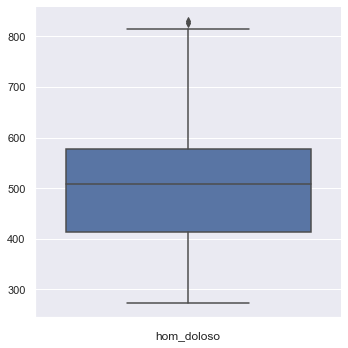

In [33]:
# gráfico de caixa para vermos a distribuição dos dados de homicídios dolosos

sns.catplot(orient='v', x='hom_doloso', kind="box", data=df);

**Visualização de Dados**

Após realizarmos algumas análises, principalmente referentes aos roubos e furtos de veículos, vamos visualizar nossos dados em gráficos para melhorarmos nosso entendimento. Começaremos com os gráficos de dispersão, que nos permitem ver qual é a relação de uma coluna 'x' com uma coluna 'y'.

No primeiro gráfico de dispersão, podemos ver que antigamente era mais comum acontecerem furtos a veículos, ou pelo menos, de eles serem registrados.

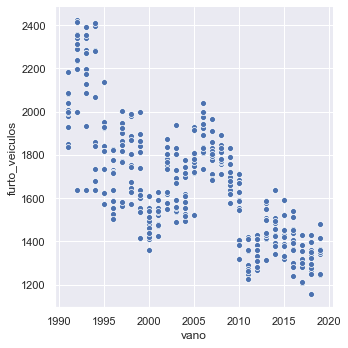

In [34]:
# gráfico de dispersão que mostra a correlação entre furto de veículo e ano de sua ocorrência

sns.relplot(x="vano", y="furto_veiculos", data=df_veiculos_clean);

Podemos ver que, no começo dos anos 90, poucos roubos a veículos eram registrados, o que mudou nos anos 2000, com um aumento bem significativo. Próximo da segunda década, os roubos diminuíram, mas, a partir de 2010, aumentaram constantemente até os dias de hoje.

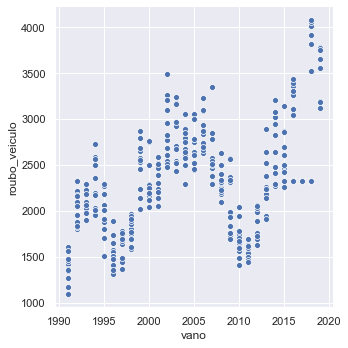

In [35]:
# gráfico de dispersão que mostra a correlação entre roubo a veículo e ano de sua ocorrência

sns.relplot(x="vano", y="roubo_veiculo", data=df_veiculos_clean);

Podemos ver que, com o passar dos anos, tivemos um aumento significativo na recuperação de veículos. Será que é a ajuda da tecnologia? É uma boa pergunta!

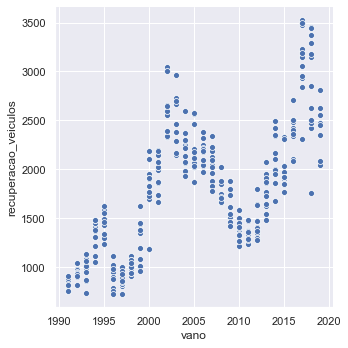

In [36]:
# gráfico de dispersão que mostra a correlação entre a recuperação de veículo e ano de sua ocorrência

sns.relplot(x="vano", y="recuperacao_veiculos", data=df_veiculos_clean);

Em um gráfico de linhas podemos visualizar que o furto de veículos diminuiu, o roubo de veículos subiu, assim como a recuperação de veículos.

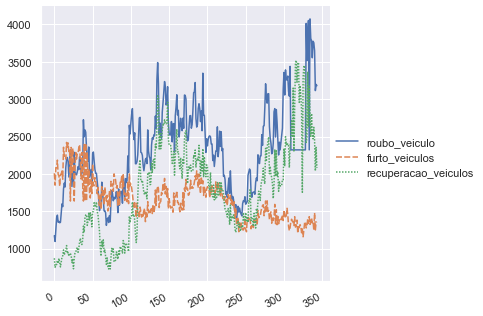

In [37]:
# visualizando os dados das colunas recuperacao_veiculos, furto_veiculos e roubo_veiculo em um gráfico de linha

g = sns.relplot(kind="line", data=df_veiculos_clean[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']])
g.fig.autofmt_xdate()

Vamos dar uma breve olhada nas informações referentes a roubos em coletivos. Podemos utilizar gráficos de linhas para vermos os nossos dados, que também nos permite ver que há registros de meses com mais de 1200 roubos em coletivos.

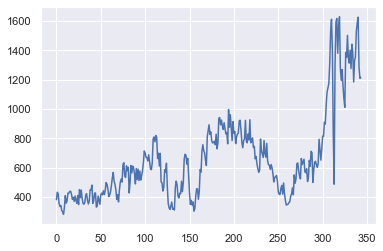

In [38]:
# visualizando os roubos em coletivos com gráfico de linha

df['roubo_em_coletivo'].plot(kind = 'line');

Podemos ver que nos últimos anos tivemos um aumento expressivo de roubos em coletivos.

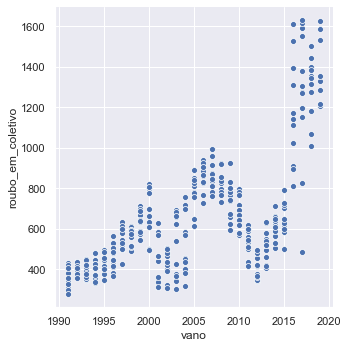

In [39]:
# visualizando a correlação de roubo em coletivo e ano de sua ocorrência

sns.relplot(x="vano", y="roubo_em_coletivo", data=df);

Olharemos também as informações referentes a homicídios dolosos. Aparentemente, antigamente eram registrados mais homicídios dolosos do que nos anos atuais.

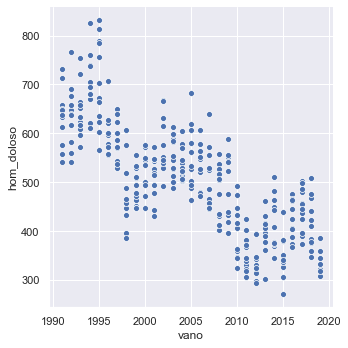

In [40]:
# visualizando a correlação entre homicídio doloso e ano de sua ocorrência

sns.relplot(x="vano", y="hom_doloso", data=df);

No histograma podemos ver a frequência dos nossos dados. Notamos que aqueles que fogem da região onde os dados estão concentrados são valores que não são muito frequentes, ou até mesmo, que são discrepantes. Podemos ver que em quase 70 meses tivemos em torno de 500 a 550 registros de homicídios dolosos.

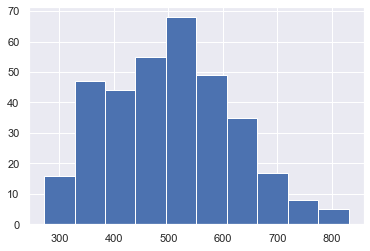

In [41]:
# visualizando a frequência dos dados dos homicídios dolosos em um histograma

df['hom_doloso'].hist();

No gráfico de linhas, podemos ver que as tentativas de homicídios aumentaram e os homicídios dolosos e culposos diminuíram.

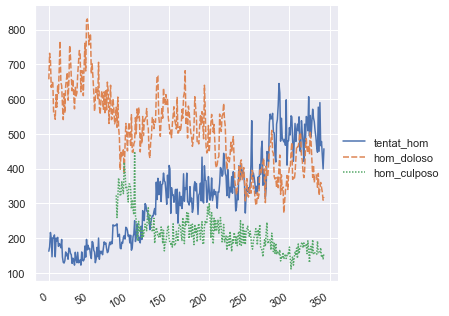

In [42]:
# visualizando os dados de homicídios dolosos, homicídios culposos e tentativos de homicídios em um gráfico de linhas

g = sns.relplot(kind="line", data=df[['tentat_hom', 'hom_doloso', 'hom_culposo']])
g.fig.autofmt_xdate()

## Conclusão

Após analisarmos diversos indicadores de violência no estado do Rio de Janeiro, pode-se dizer que, de acordo com os dados do ([ISPDados](http://www.ispdados.rj.gov.br/)), nos tempos atuais, acontecem:
* Mais roubos em coletivos;
* Menos homicídios dolosos e culposos;
* Mais tentativas de homicídio;
* Menos furtos de veículos;
* Mais roubos de veículos;
* Mais recuperações de veículos.